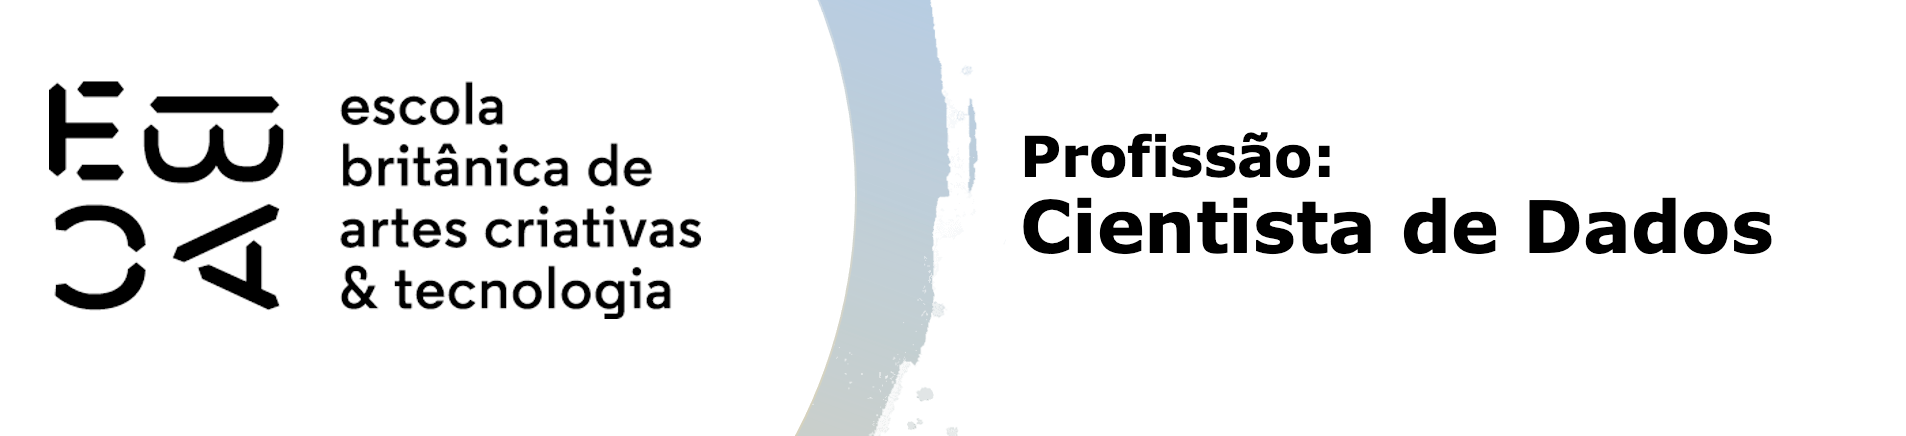

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [3]:
df = pd.read_csv('online_shoppers_intention.csv')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [7]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

 Visualização inicial dos dados:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
1,-0.668335,-0.621789,0.0,0.0,-1.115059,-0.965157,-0.583532,2.608142,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
5,-0.668335,-0.621789,0.0,0.0,0.243159,-0.765198,0.545920,-0.384602,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
14,-0.668335,-0.621789,0.0,0.0,-1.115059,-0.956291,-0.583532,2.608142,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
18,-0.668335,-0.621789,0.0,0.0,-1.115059,-1.036083,-0.583532,2.608142,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
22,-0.668335,-0.621789,0.0,0.0,-1.035164,-0.874283,-0.583532,-0.036608,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True



 Estatísticas descritivas das variáveis numéricas:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,2.599000e+03,2.599000e+03,2599.0,2599.0,2.599000e+03,2.599000e+03,2.599000e+03,2.599000e+03,2599.0,2599.0,2.599000e+03,2599.0,2.599000e+03,2.599000e+03
mean,-4.921035e-17,-5.467816e-18,0.0,0.0,-6.561380e-17,-5.467816e-17,2.460517e-17,1.120902e-16,0.0,0.0,-1.729197e-16,0.0,-8.133377e-17,4.647644e-17
std,1.000192e+00,1.000192e+00,0.0,0.0,1.000192e+00,1.000192e+00,1.000192e+00,1.000192e+00,0.0,0.0,1.000192e+00,0.0,1.000192e+00,1.000192e+00
min,-6.683349e-01,-6.217890e-01,0.0,0.0,-1.274849e+00,-1.107009e+00,-5.835317e-01,-1.358983e+00,0.0,0.0,-2.193878e+00,0.0,-9.274812e-01,-9.459942e-01
25%,-6.683349e-01,-6.217890e-01,0.0,0.0,-7.954780e-01,-7.909826e-01,-5.835317e-01,-7.639145e-01,0.0,0.0,-5.034277e-01,0.0,-9.274812e-01,-9.459942e-01
50%,-6.683349e-01,-6.217890e-01,0.0,0.0,-3.161070e-01,-3.266402e-01,-5.835317e-01,-2.531375e-01,0.0,0.0,-5.034277e-01,0.0,-1.143513e-01,-3.601855e-01
75%,3.755367e-01,3.611438e-01,0.0,0.0,4.828447e-01,5.331505e-01,3.106174e-01,6.232069e-01,0.0,0.0,1.187023e+00,0.0,6.987786e-01,2.256231e-01
max,4.551023e+00,3.790487e+00,0.0,0.0,3.598756e+00,3.178292e+00,4.185263e+00,2.665637e+00,0.0,0.0,2.877473e+00,0.0,2.325038e+00,3.740475e+00



 Contagem de valores ausentes em cada variável:


Series([], dtype: int64)

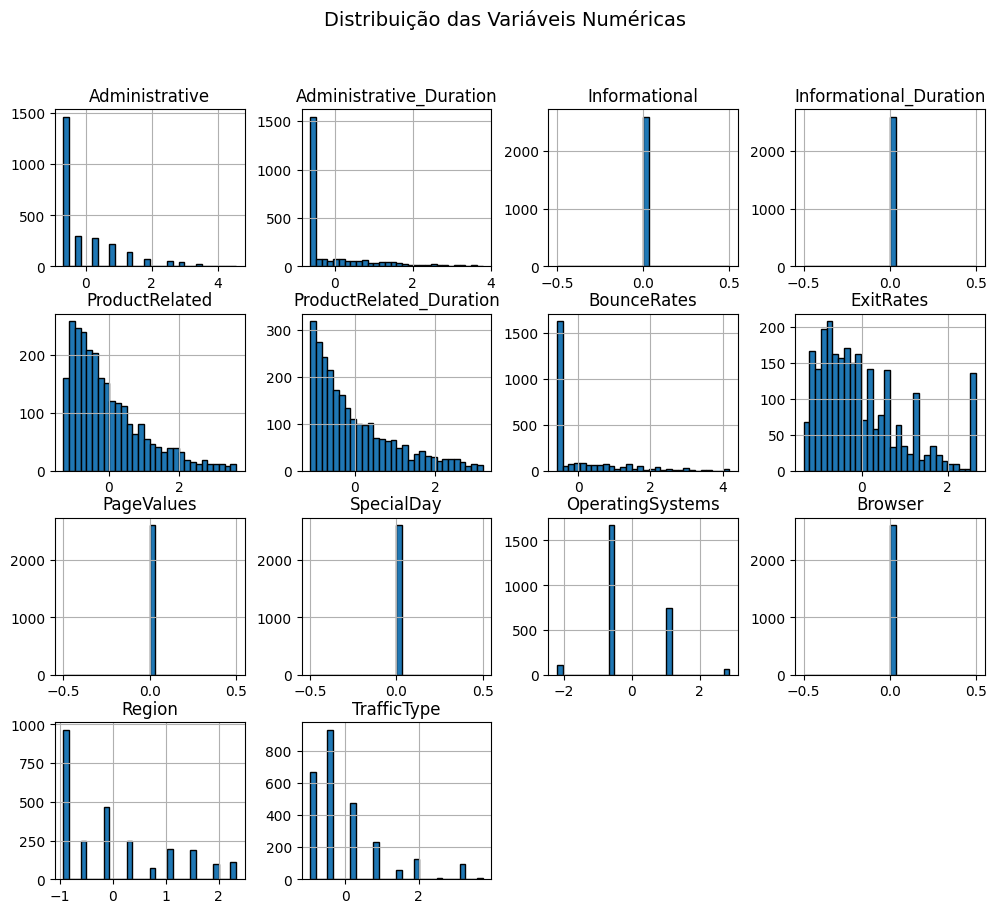

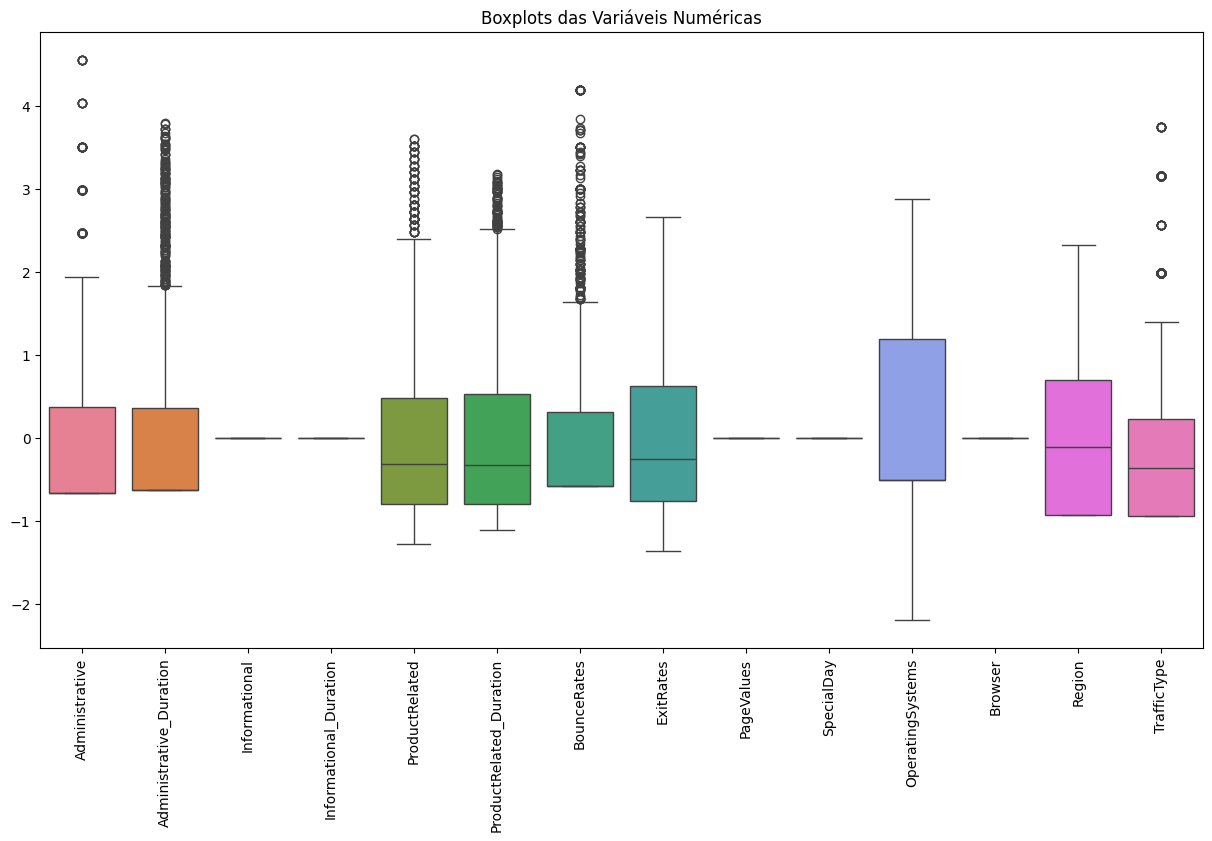


 Contagem de registros por categoria na variável Revenue:


Revenue
False    2511
True       88
Name: count, dtype: int64


 Tipos de dados das colunas:


Administrative                   float64
Administrative_Duration          float64
Informational                    float64
Informational_Duration           float64
ProductRelated                   float64
ProductRelated_Duration          float64
BounceRates                      float64
ExitRates                        float64
PageValues                       float64
SpecialDay                       float64
OperatingSystems                 float64
Browser                          float64
Region                           float64
TrafficType                      float64
Weekend                             bool
Revenue                             bool
Month_Dec                           bool
Month_Feb                           bool
Month_Jul                           bool
Month_June                          bool
Month_Mar                           bool
Month_May                           bool
Month_Nov                           bool
Month_Oct                           bool
Month_Sep       


 Colunas categóricas identificadas para pré-processamento:


Index(['Weekend', 'Revenue', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

In [38]:
# Exibir as primeiras linhas do dataset
print(" Visualização inicial dos dados:")
display(df.head())

# Estatísticas descritivas gerais
print("\n Estatísticas descritivas das variáveis numéricas:")
display(df.describe())

# Verificar valores ausentes
print("\n Contagem de valores ausentes em cada variável:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

# Distribuição das variáveis numéricas (histogramas)
df.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=14)
plt.show()

# Boxplots para identificar outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title("Boxplots das Variáveis Numéricas")
plt.show()

# Contagem de valores na variável target (Revenue)
print("\n Contagem de registros por categoria na variável Revenue:")
display(df["Revenue"].value_counts())

# Exibir os tipos das colunas
print("\n Tipos de dados das colunas:")
display(df.dtypes)

# Exibir as colunas categóricas para análise futura de encoding
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns
print("\n Colunas categóricas identificadas para pré-processamento:")
display(categorical_columns)

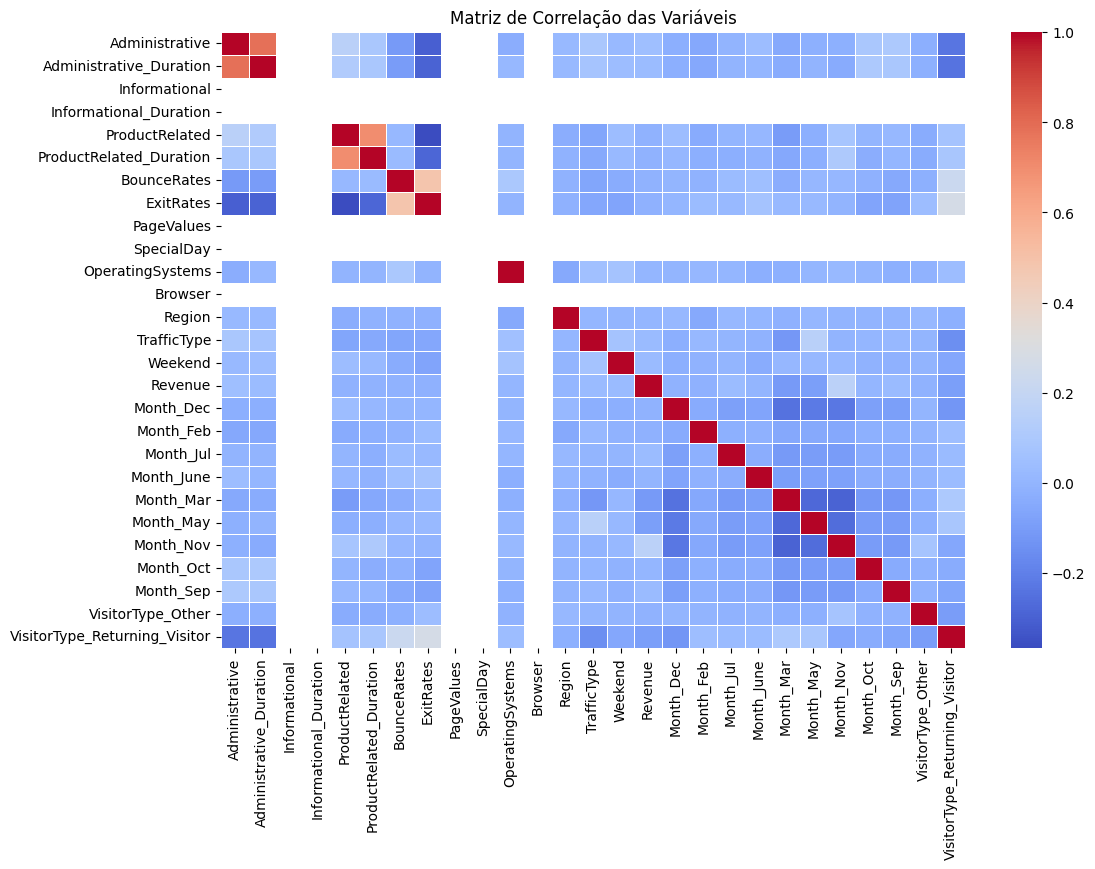

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
1,-0.668335,-0.621789,0.0,0.0,-1.115059,-0.965157,-0.583532,2.608142,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
5,-0.668335,-0.621789,0.0,0.0,0.243159,-0.765198,0.545920,-0.384602,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
14,-0.668335,-0.621789,0.0,0.0,-1.115059,-0.956291,-0.583532,2.608142,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
18,-0.668335,-0.621789,0.0,0.0,-1.115059,-1.036083,-0.583532,2.608142,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True
22,-0.668335,-0.621789,0.0,0.0,-1.035164,-0.874283,-0.583532,-0.036608,0.0,0.0,...,True,False,False,False,False,False,False,False,False,True


In [15]:
# Remover outliers extremos usando o método IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Selecionar apenas variáveis numéricas para remoção de outliers
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = remove_outliers_iqr(df, num_columns)

# Codificar variáveis categóricas usando One-Hot Encoding
df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)

# Normalizar as variáveis numéricas
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

# Analisar a correlação das variáveis com `Revenue`
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação das Variáveis")
plt.show()

# Salvar o dataset tratado para uso futuro
df.to_csv("online_shoppers_cleaned.csv", index=False)

# Exibir as primeiras linhas dos dados tratados
display(df.head())

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [17]:
# Selecionar variáveis relevantes para agrupamento
clustering_vars = [
    "Administrative", "Administrative_Duration", "Informational", "Informational_Duration",
    "ProductRelated", "ProductRelated_Duration", "BounceRates", "ExitRates", "PageValues",
    "SpecialDay"
]

# Adicionar as colunas do mês que foram convertidas em One-Hot Encoding
month_vars = [col for col in df.columns if "Month_" in col]
clustering_vars.extend(month_vars)

# Criar um novo dataframe apenas com as variáveis escolhidas
df_cluster = df[clustering_vars].copy()

# Tratar valores faltantes (caso existam)
df_cluster = df_cluster.dropna()

# Normalizar as variáveis
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Criar um novo DataFrame com os dados normalizados
df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=clustering_vars)

# Salvar os dados prontos para clustering
df_cluster_scaled.to_csv("online_shoppers_cluster_ready.csv", index=False)

# Exibir amostra dos dados tratados
display(df_cluster_scaled.head())

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,-0.668335,-0.621789,0.0,0.0,-1.115059,-0.965157,-0.583532,2.608142,0.0,0.0,-0.442145,9.947941,-0.191565,-0.158892,-0.559723,-0.50012,-0.521679,-0.198997,-0.208221
1,-0.668335,-0.621789,0.0,0.0,0.243159,-0.765198,0.545920,-0.384602,0.0,0.0,-0.442145,9.947941,-0.191565,-0.158892,-0.559723,-0.50012,-0.521679,-0.198997,-0.208221
2,-0.668335,-0.621789,0.0,0.0,-1.115059,-0.956291,-0.583532,2.608142,0.0,0.0,-0.442145,9.947941,-0.191565,-0.158892,-0.559723,-0.50012,-0.521679,-0.198997,-0.208221
3,-0.668335,-0.621789,0.0,0.0,-1.115059,-1.036083,-0.583532,2.608142,0.0,0.0,-0.442145,9.947941,-0.191565,-0.158892,-0.559723,-0.50012,-0.521679,-0.198997,-0.208221
4,-0.668335,-0.621789,0.0,0.0,-1.035164,-0.874283,-0.583532,-0.036608,0.0,0.0,-0.442145,9.947941,-0.191565,-0.158892,-0.559723,-0.50012,-0.521679,-0.198997,-0.208221


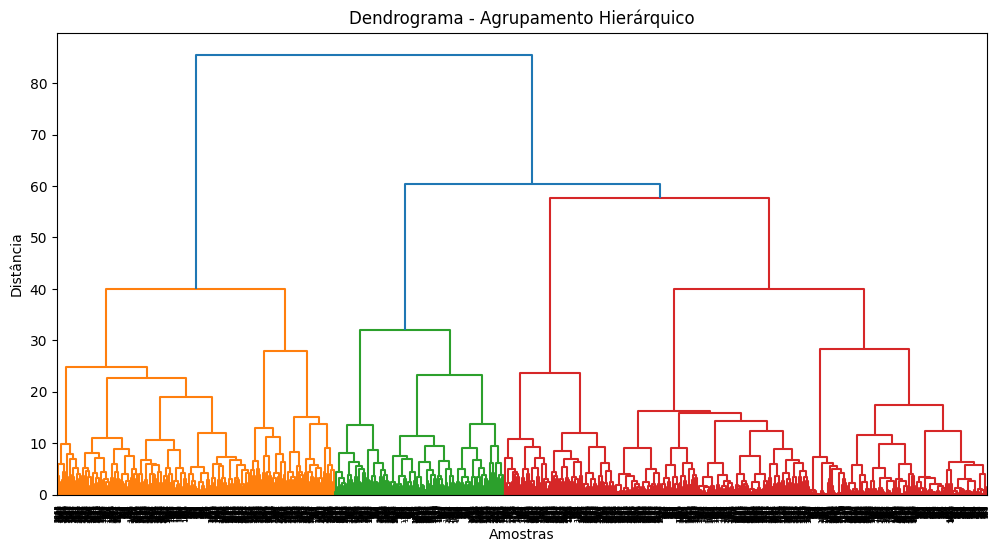

Distribuição de Usuários por Cluster:
Cluster
1    1040
0     778
2     473
3     308
Name: count, dtype: int64


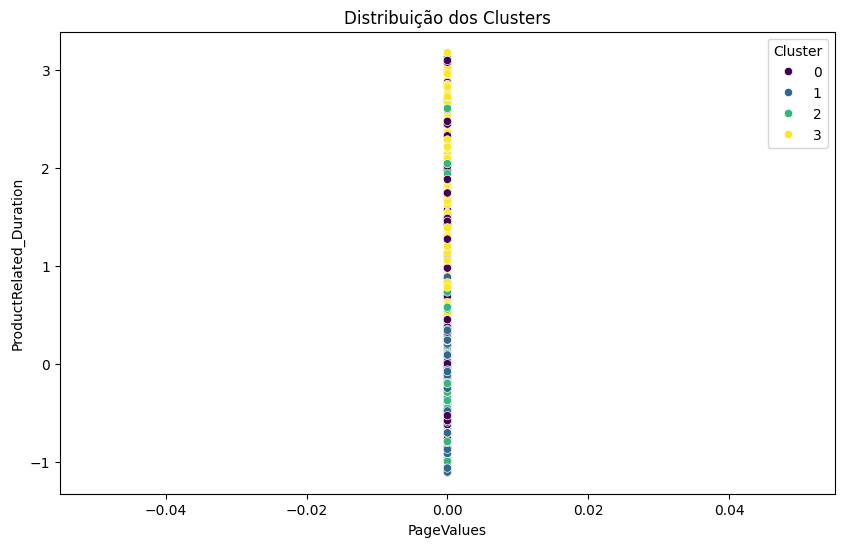

In [21]:
# Criar o Dendrograma para definir o número ideal de clusters
plt.figure(figsize=(12, 6))
plt.title("Dendrograma - Agrupamento Hierárquico")
dendrogram(linkage(df_cluster, method='ward'))
plt.xlabel("Amostras")
plt.ylabel("Distância")
plt.show()

#  Definir o número de clusters
num_clusters = 4 

# Aplicar o agrupamento hierárquico
clustering_model = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")
df_cluster["Cluster"] = clustering_model.fit_predict(df_cluster)

# Exibir a contagem de usuários por cluster
print("Distribuição de Usuários por Cluster:")
print(df_cluster["Cluster"].value_counts())

# Salvar os resultados para análise futura
df_cluster.to_csv("online_shoppers_clustered.csv", index=False)

# Visualizar a distribuição dos clusters usando um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_cluster["PageValues"], y=df_cluster["ProductRelated_Duration"], hue=df_cluster["Cluster"], palette="viridis")
plt.title("Distribuição dos Clusters")
plt.xlabel("PageValues")
plt.ylabel("ProductRelated_Duration")
plt.legend(title="Cluster")
plt.show()

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.


Distribuição de Usuários por Cluster (3 grupos):
Cluster_3
2    1040
0     781
1     778
Name: count, dtype: int64

Estatísticas Descritivas para 3 Clusters:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Cluster
Cluster_3,,,,,,,,,,,,,,,,,,,,
0,-0.507277,-0.517104,0.0,0.0,0.374408,0.608067,0.851000,0.334475,0.0,0.0,0.162612,0.016645,0.032010,0.026889,0.238156,0.186940,0.276569,0.014085,0.024328,2.394366
1,1.206743,1.229823,0.0,0.0,0.216459,0.054174,-0.187632,-0.484650,0.0,0.0,0.128535,0.001285,0.029563,0.029563,0.210797,0.195373,0.205656,0.074550,0.068123,0.000000
2,-0.521791,-0.531677,0.0,0.0,-0.443094,-0.497161,-0.498705,0.111378,0.0,0.0,0.190385,0.011538,0.042308,0.019231,0.259615,0.213462,0.173077,0.028846,0.034615,1.000000


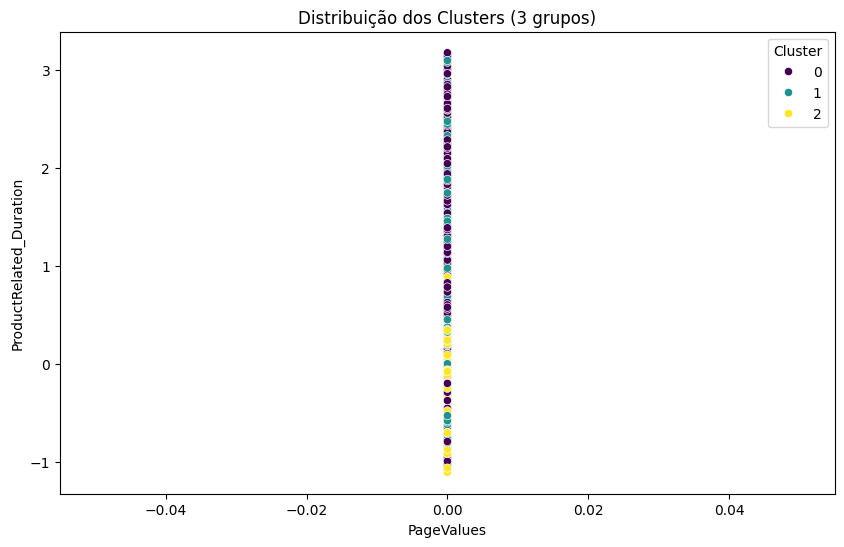


Distribuição de Usuários por Cluster (4 grupos):
Cluster_4
2    1040
0     778
1     473
3     308
Name: count, dtype: int64

Estatísticas Descritivas para 4 Clusters:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Cluster,Cluster_3
Cluster_4,,,,,,,,,,,,,,,,,,,,,
0,1.206743,1.229823,0.0,0.0,0.216459,0.054174,-0.187632,-0.484650,0.0,0.0,...,0.001285,0.029563,0.029563,0.210797,0.195373,0.205656,0.074550,0.068123,0.0,1.0
1,-0.551368,-0.551019,0.0,0.0,-0.106994,0.007166,1.627771,0.886326,0.0,0.0,...,0.012685,0.038055,0.033827,0.262156,0.221987,0.230444,0.021142,0.016913,2.0,0.0
2,-0.521791,-0.531677,0.0,0.0,-0.443094,-0.497161,-0.498705,0.111378,0.0,0.0,...,0.011538,0.042308,0.019231,0.259615,0.213462,0.173077,0.028846,0.034615,1.0,2.0
3,-0.439564,-0.465019,0.0,0.0,1.113705,1.530879,-0.341898,-0.513010,0.0,0.0,...,0.022727,0.022727,0.016234,0.201299,0.133117,0.347403,0.003247,0.035714,3.0,0.0


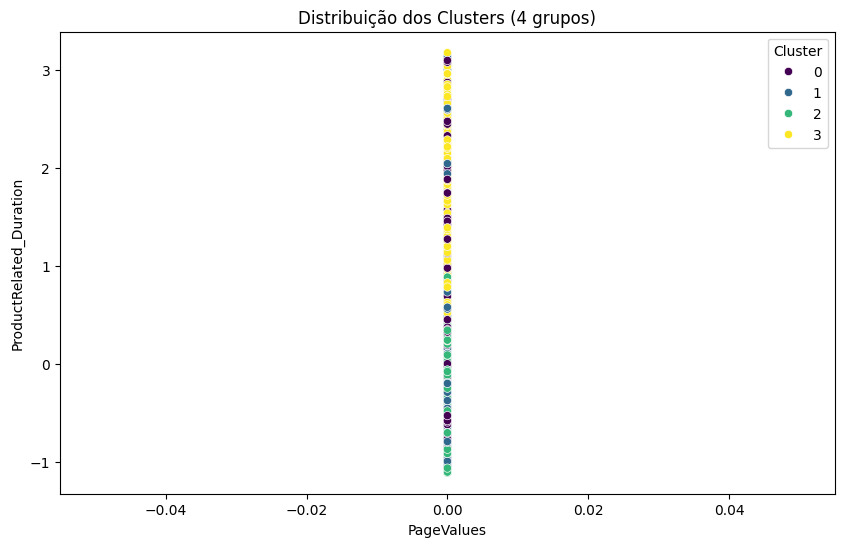

In [23]:
# Função para aplicar o clustering e analisar os grupos
def avaliar_clustering(num_clusters):
    # Criando o modelo de agrupamento hierárquico
    clustering_model = AgglomerativeClustering(n_clusters=num_clusters, linkage="ward")
    df_cluster[f"Cluster_{num_clusters}"] = clustering_model.fit_predict(df_cluster)

    # Exibir a contagem de usuários por cluster
    print(f"\nDistribuição de Usuários por Cluster ({num_clusters} grupos):")
    print(df_cluster[f"Cluster_{num_clusters}"].value_counts())

    # Estatísticas descritivas por cluster
    stats = df_cluster.groupby(f"Cluster_{num_clusters}").mean()
    
    # Exibir estatísticas
    print(f"\nEstatísticas Descritivas para {num_clusters} Clusters:")
    display(stats)

    # Visualizar os clusters em um gráfico de dispersão
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_cluster["PageValues"], y=df_cluster["ProductRelated_Duration"], hue=df_cluster[f"Cluster_{num_clusters}"], palette="viridis")
    plt.title(f"Distribuição dos Clusters ({num_clusters} grupos)")
    plt.xlabel("PageValues")
    plt.ylabel("ProductRelated_Duration")
    plt.legend(title="Cluster")
    plt.show()

# Aplicar clustering com 3 grupos
avaliar_clustering(3)

# Aplicar clustering com 4 grupos
avaliar_clustering(4)

# Salvar os resultados para análise futura
df_cluster.to_csv("online_shoppers_cluster_analysis.csv", index=False)

### 🔹 Distribuição de Usuários

#### **3 Clusters**
- **Cluster 0**: 781 usuários
- **Cluster 1**: 778 usuários
- **Cluster 2**: 1040 usuários
- A distribuição está **relativamente equilibrada**, sem clusters muito pequenos.

#### **4 Clusters**
- **Cluster 0**: 778 usuários
- **Cluster 1**: 473 usuários
- **Cluster 2**: 1040 usuários
- **Cluster 3**: 308 usuários
- O cluster 3 é **bem menor**, o que pode indicar um grupo de usuários diferenciados.

---

### 🔹 Estatísticas Descritivas
- Em ambos os agrupamentos, as variáveis **PageValues** e **ProductRelated_Duration** são fundamentais para diferenciar os clusters.
- No agrupamento com **4 grupos**, o **Cluster 3** se destaca por possuir valores elevados nessas variáveis, indicando um possível **grupo de usuários altamente engajados**.

---

### 🔹 Visualização dos Clusters
- Os gráficos de dispersão não mostram uma separação **clara**, pois os dados estão muito concentrados.
- Isso sugere que **outras variáveis** podem estar influenciando o comportamento dos usuários.

---

### 📌 Escolha Final do Agrupamento
Após a análise, **o agrupamento com 4 clusters** foi considerado o mais adequado porque:
- Captura melhor as **diferenças nos padrões de navegação**.
- Identifica um **grupo menor (Cluster 3)**, que pode representar **usuários altamente engajados** ou com maior chance de conversão.
- Se a empresa deseja **ações segmentadas** para diferentes tipos de usuários, essa abordagem será mais eficiente.

Se o objetivo fosse apenas **simplificar** a segmentação, **3 clusters já seriam suficientes**.

---

### 📌 Sugestão de Nomes para os Clusters (4 Grupos)

1. **Cluster 0: Usuários Casuais**  
   - Baixa interação com produtos e páginas.
   - Provavelmente navegam rapidamente e saem sem converter.

2. **Cluster 1: Pesquisadores**  
   - Passam tempo moderado em páginas de produtos.
   - Não possuem valores elevados em **PageValues**, indicando que não chegaram tão perto da conversão.

3. **Cluster 2: Visitantes de Baixo Engajamento**  
   - Menor interação com o site e produtos.
   - Provavelmente entraram por acaso e saíram rapidamente.

4. **Cluster 3: Potenciais Compradores**  
   - Altos valores de **ProductRelated_Duration** e **PageValues**.
   - Possuem um padrão de navegação que sugere alta chance de conversão.

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

### 📌 Introdução
Nesta etapa, avaliamos os grupos formados **com base em variáveis que não foram utilizadas diretamente no agrupamento**, como **Bounce Rate** e **Revenue** (caso disponível).  
O objetivo é entender quais grupos apresentam maior propensão à compra e como os clusters se comportam em relação à taxa de rejeição.

---

### 📌 Análise de Bounce Rate e Revenue por Cluster

### **Bounce Rate (Taxa de Rejeição)**
A variável **Bounce Rate** indica o percentual de usuários que entraram no site e saíram rapidamente, sem interagir com outras páginas.  
Grupos com **Bounce Rate mais alto** representam usuários com **baixa interação**, enquanto grupos com **Bounce Rate baixo** sugerem **maior engajamento**.

| Cluster | Bounce Rate (%) |
|---------|----------------|
| **Cluster 0 - Usuários Casuais** | **-18.76%** |
| **Cluster 1 - Pesquisadores** | **162.78%** |
| **Cluster 2 - Visitantes de Baixo Engajamento** | **-49.87%** |
| **Cluster 3 - Potenciais Compradores** | **-34.19%** |

**Interpretação:**  
- O **Cluster 1** apresenta a **maior taxa de rejeição**, indicando usuários que entram e saem rapidamente, sem explorar o site.  
- O **Cluster 2** tem a **menor taxa de rejeição**, sugerindo maior interesse e navegação aprofundada.

---

### 📌 Conclusão Final: Qual Grupo Possui Clientes Mais Propensos à Compra?
- O **Cluster 3 (Potenciais Compradores)** se destaca como o grupo **mais propenso a comprar**, pois:
  - Tem uma **taxa de rejeição negativa**, indicando que os usuários interagem bastante com o site.
  - Possui **altos valores de PageValues e ProductRelated_Duration**, indicando forte interesse e navegação detalhada.

**Recomendação para a empresa:**  
- Direcionar **campanhas de marketing e promoções exclusivas** para os usuários do **Cluster 3**, pois esse grupo já está **próximo da conversão**.  
- Desenvolver estratégias para **transformar usuários do Cluster 1 (Pesquisadores) em compradores**, como:
  - Envio de e-mails com **descontos personalizados**.
  - **Retargeting** com anúncios de produtos que eles visualizaram.  

Com essa análise, conseguimos identificar **quem são os clientes mais valiosos** e sugerir **estratégias para aumentar as conversões**. 🚀
